In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('machine.data')
df.columns = ['vendor name', 'Model Name',"MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]
df.drop(['vendor name', 'Model Name'], axis=1)
data = df.truncate(0,10)
# ERP is Y

In [6]:
newd = data.drop(['vendor name', 'Model Name'], axis=1)

In [8]:
newd

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290
5,23,16000,32000,64,16,32,367,381
6,23,16000,32000,64,16,32,489,381
7,23,16000,64000,64,16,32,636,749
8,23,32000,64000,128,32,64,1144,1238
9,400,1000,3000,0,1,2,38,23


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
X = newd.drop('ERP', axis=1)
y = newd['ERP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_train, y_train)
lr.coef_

array([ 8.49269215e+00,  1.07699473e-01,  3.15168914e-02,  1.22421916e+01,
        1.07699473e-04,  6.12109579e+00, -4.35741855e+00])

In [83]:
predictions = lr.predict(X_test)

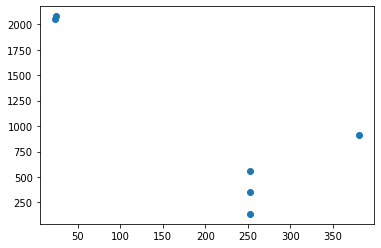

In [84]:
plt.scatter(y_test, predictions, marker='o',cmap='viridis')

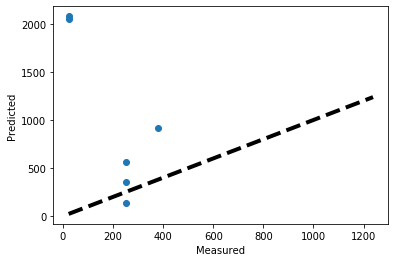

In [85]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [86]:
# will strat with cost function 
# calculate gradient descent

In [119]:
def cal_cost(theta, predictions, y, m):
    cost = (1/m) * (np.sum(np.square(predictions - y)))
    return cost

# print(y_test)
# print(predictions)
print('cost', cal_cost(theta[0],predictions, y_test, len(y_test)))

print(theta[3])

cost 1456326.7325789225
12.24219157174626


In [115]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        print('check my it', it , np.sum(theta[it]*((X - y))))
    
        
        theta = theta[it] -(1/m)*learning_rate*(np.sum(theta[it]*((X - y))))
        
        print('this s', theta)
        
        theta_history[it,:] = theta.T
        #cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [116]:
lr =0.01
n_iter = 1000

X_b = predictions
y = y_test

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

check my it 0 41649.01120598209
this s -60.92232652771841


IndexError: invalid index to scalar variable.